In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)

In [4]:
df = df.mask(df.eq('Iris-virginica')).dropna()
del df[1]
del df[3]

In [5]:
df.tail()

,0,2,4
95,5.7,4.2,Iris-versicolor
96,5.7,4.2,Iris-versicolor
97,6.2,4.3,Iris-versicolor
98,5.1,3.0,Iris-versicolor
99,5.7,4.1,Iris-versicolor


In [12]:
class ModAdaline():
    def __init__(self):
        self.weights = [0.2, 0.2]
        self.bias = 0.2
        
    def decision_function(self, x):
        return x

    def predict(self, x):
        first = x[0]
        first = first* float(self.weights[0])
        second = x[1]
        second = second* float(self.weights[1])
        return self.decision_function(first + second + self.bias)

    def weight_update(self, w, learn_rate, error, x):
        return float(w + (learn_rate * error * x))

    def train(self, x, y,learning_rate=0.001,iterations=300):
        self.weights = [0.2, 0.2]
        self.bias = 0.2
        for _ in range(0, iterations):
            for i in range(0,len(x)):
                predicted_value = self.predict(x[i])
                error_in_prediction = y[i][0] - predicted_value
                for j in range(0, len(self.weights)):
                    self.weights[j] = self.weight_update(self.weights[j], learning_rate, error_in_prediction, x[i][j])
                self.bias = self.bias + (learning_rate * error_in_prediction)
        return [self.bias]+self.weights
    

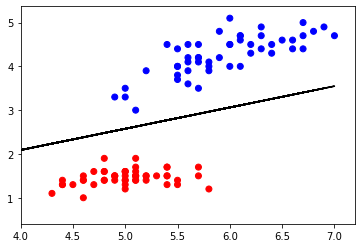

In [13]:
x = np.array([df[0],df[2]]).T
y=np.array([df[4]]).T
y = np.where(y == "Iris-setosa" ,-1,1)

perceptron = ModAdaline()
values_for_chart = perceptron.train(x,y)

plot_dict = {'Iris-setosa': 'red', 'Iris-versicolor': 'blue'}
fig, ax = plt.subplots()
axes = plt.gca()
axes.set_xlim([4,7.2])
values_for_chart = values_for_chart[1]/(-1*values_for_chart[2])*x+values_for_chart[0]/(values_for_chart[2]*-1)
plt.plot(x, values_for_chart, c="black")
ax.scatter(df[0], df[2], c=df[4].apply(lambda x: plot_dict[x]))

plt.show()
plt.show()